# Import packages

In [ ]:
!pip install pingouin

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

In [6]:
drug_safety.head()

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0


Text(0.5, 1.0, 'Distribution of the Number of Effects Between the Groups')

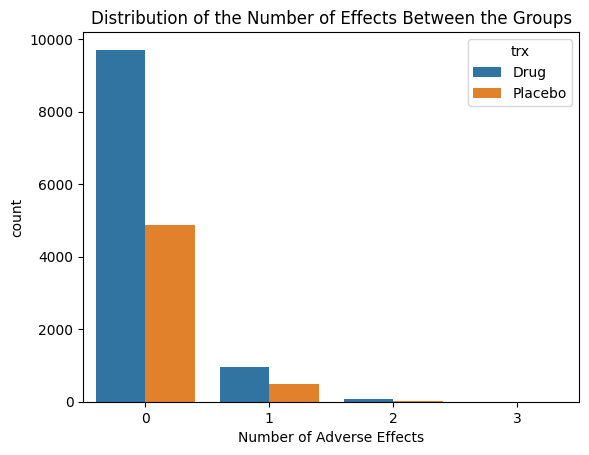

In [7]:
# Create a countplot of num_effects vs trx
plot_num_eff = sns.countplot(x="num_effects", data=drug_safety, hue='trx')

# Set the x axis label and title
plt.xlabel("Number of Adverse Effects")
plt.title("Distribution of the Number of Effects Between the Groups")



In [11]:
# Count the adverse_effects column values for each trx group
adv_eff_by_trx = drug_safety.groupby("trx").adverse_effects.value_counts()
#print(f"{'adv_eff_by_trx'}: {adv_eff_by_trx}")

# Compute total rows in each group
adv_eff_by_trx_totals = adv_eff_by_trx.groupby("trx").sum()
#print(f"{'adv_eff_by_trx_totals'}: {adv_eff_by_trx_totals}")

# Create an array of the "Yes" counts for each group
yeses = [adv_eff_by_trx["Drug"]["Yes"], adv_eff_by_trx["Placebo"]["Yes"]]
print(f"{'yes_Drug, yes_Placebo'}: {yeses}")

# Create an array of the total number of rows in each group
n = [adv_eff_by_trx_totals["Drug"], adv_eff_by_trx_totals["Placebo"]]

# Perform a two-sided z-test on the two proportions
two_samp_z_stat, two_samp_z_p_value = proportions_ztest(yeses, n)

# Round to three decimal places
two_samp_z_stat = np.round(two_samp_z_stat, 3)
two_samp_z_p_value = np.round(two_samp_z_p_value, 3)
print(f"{'z_stat'}: {two_samp_z_stat}")
print(f"{'p_value'}: {two_samp_z_p_value}")

yes_Drug, yes_Placebo: [1024, 512]
z_stat: 0.045
p_value: 0.964


In [15]:
# Determine if num_effects and trx are independent
expected, observed, stats = pingouin.chi2_independence(
    data=drug_safety, x="num_effects", y="trx")

# Round the test statistics to three decimal places
stats = stats.round(3)

# Extract the Pearson row as pearson_num_effect_trx
pearson_num_effect_trx = stats[stats["test"] == "pearson"]

print(f"{'pearson_num_effect_trx'},{pearson_num_effect_trx}")

pearson_num_effect_trx,      test  lambda  chi2  dof   pval  cramer  power
0  pearson     1.0   1.8  3.0  0.615   0.011  0.176


/usr/local/lib/python3.10/dist-packages/pingouin/contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/usr/local/lib/python3.10/dist-packages/pingouin/contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


Text(0.5, 1.0, 'Distribution of Age in the Placebo Group')

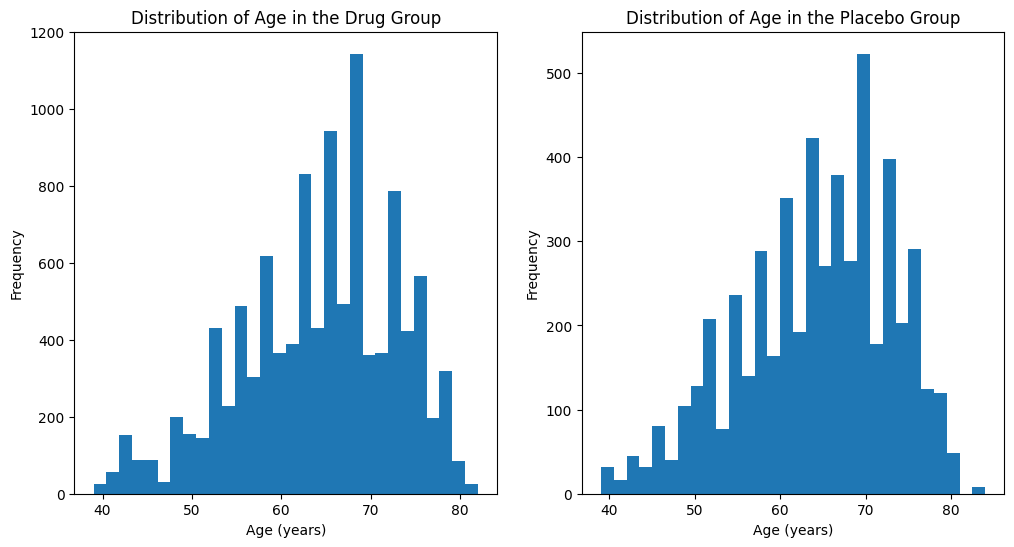

In [17]:
# Creating histograms to visualize the distribution of ages by treatment
# Create the plot axes. Increase the figure size
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Set x and y axes labels
xlabel = "Age (years)"
ylabel = "Frequency"

# The Drug group's age distribution
ax1.hist(x="age", data=drug_safety[drug_safety["trx"] == "Drug"], bins=30)
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.set_title("Distribution of Age in the Drug Group")


# The Placebo group's age distribution
ax2.hist(x="age", data=drug_safety[drug_safety["trx"] == "Placebo"], bins=30)
ax2.set_xlabel(xlabel)
ax2.set_ylabel(ylabel)
ax2.set_title("Distribution of Age in the Placebo Group")

In [21]:
# Select the age of the Drug group
age_trx = drug_safety.loc[drug_safety["trx"] == "Drug", "age"]
#print(age_trx)

# Select the age of the Placebo group
age_placebo = drug_safety.loc[drug_safety["trx"] == "Placebo", "age"]


# The distributions strongly suggest a
# non-parametric independent samples test.
# Conduct a two-sided Wilcoxon-Mann-Whitney test
two_samp_ind_results = pingouin.mwu(age_trx, age_placebo).round(3)
print(two_samp_ind_results)

          U-val alternative  p-val    RBC   CLES
MWU  29149339.5   two-sided  0.257 -0.011  0.505
